In [1]:
from IMPORTS import *

seed_value = 16
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encoun

Reading ATE json files

In [2]:
ATE_train = None
ATE_test = None
ATE_val = None
with open("Task1\processed\ATE_train.json") as f1:
    ATE_train  = json.load(f1)

with open("Task1\processed\ATE_test.json") as f2:
    ATE_test = json.load(f2)

with open("Task1\processed\ATE_val.json") as f3:
    ATE_val = json.load(f3)

Reading NER json files

In [3]:
NER_train = None
NER_test = None
NER_val = None
with open("Task1\processed\\NER_train.json") as f1:
    NER_train  = json.load(f1)

with open("Task1\processed\\NER_test.json") as f2:
    NER_test = json.load(f2)

with open("Task1\processed\\NER_val.json") as f3:
    NER_val = json.load(f3)

Loading the pre-trained models (Word2Vec, GloVE and fasttext)

In [4]:
word2vec = KeyedVectors.load_word2vec_format('WordEmbeddings/Word2Vec.bin',binary=True)

ATE Dataset

In [5]:
X_train_ate,Y_train_ate= create_train_test_val(ATE_train)
X_test_ate,Y_test_ate = create_train_test_val(ATE_test)
X_val_ate,Y_val_ate = create_train_test_val(ATE_val)

NER Dataset

In [6]:
X_train_ner,Y_train_ner = create_train_test_val(NER_train)
X_test_ner,Y_test_ner = create_train_test_val(NER_test)
X_val_ner,Y_val_ner = create_train_test_val(NER_val)

Tokenizing the ATE Dataset

In [7]:
X_train_ate_tokenized, toke = TokenCreator(X_train_ate,1)
X_test_ate_tokenized = TokenCreator(X_test_ate,0,tokenizer = toke)
X_val_ate_tokenized = TokenCreator(X_val_ate,0,tokenizer = toke)

Y_train_ate_tokenized,toke2 = TokenCreator(Y_train_ate,0)
Y_test_ate_tokenized = TokenCreator(Y_test_ate,0,tokenizer = toke2)
Y_val_ate_tokenized = TokenCreator(Y_val_ate,0,tokenizer = toke2)

Tokenizing the NER Dataset

In [8]:
# X_train_ner_tokenized, toke_ner = TokenCreator(X_train_ner,1)
# X_test_ner_tokenized = TokenCreator(X_test_ner,0,tokenizer = toke_ner)
# X_val_ner_tokenized = TokenCreator(X_val_ner,0,tokenizer = toke_ner)

# Y_train_ner_tokenized,toke2_ner = TokenCreator(Y_train_ner,0)
# Y_test_ner_tokenized = TokenCreator(Y_test_ner,0,tokenizer = toke2_ner)
# Y_val_ner_tokenized = TokenCreator(Y_val_ner,0,tokenizer = toke2_ner)

Vocabulary of ATE

In [9]:
st1 = find_vocab(X_train_ate_tokenized)
vocab_size_ate  = len(st1) + 1 
vocab_size_ate

2406

Vocabulary of NER

In [10]:
# st2 = find_vocab(X_train_ner_tokenized)
# # vocab_size_ner = len(st2) + 1
# vocab_size_ner

Padding ATE

In [11]:
X_padded_train = pad_sequences(X_train_ate_tokenized, maxlen=78, padding="pre", truncating="post")
Y_padded_train = pad_sequences(Y_train_ate_tokenized, maxlen=78, padding="pre", truncating="post")

X_padded_test = pad_sequences(X_test_ate_tokenized, maxlen=78, padding="pre", truncating="post")
Y_padded_test = pad_sequences(Y_test_ate_tokenized, maxlen=78, padding="pre", truncating="post")

X_padded_val = pad_sequences(X_val_ate_tokenized, maxlen=78, padding="pre", truncating="post")
Y_padded_val = pad_sequences(Y_val_ate_tokenized, maxlen=78, padding="pre", truncating="post")

Padding NER

In [12]:
# X_padded_train_ner = pad_sequences(X_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_train_ner = pad_sequences(Y_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")

# X_padded_test_ner = pad_sequences(X_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_test_ner = pad_sequences(Y_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")

# X_padded_val_ner = pad_sequences(X_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")
# Y_padded_val_ner = pad_sequences(Y_val_ner_tokenized, maxlen=100, padding="pre", truncating="post") 

One hot encoding the ATE labels

In [13]:
Y_padded_train = to_categorical(Y_padded_train)
Y_padded_test = to_categorical(Y_padded_test)
Y_padded_val = to_categorical(Y_padded_val)

One hot encoding the NER labels

In [14]:
# Y_padded_train_ner = to_categorical(Y_padded_train_ner)
# Y_padded_test_ner = to_categorical(Y_padded_test_ner)
# Y_padded_val_ner = to_categorical(Y_padded_val_ner)

Assigning ATE Word2Vec mapping

In [15]:
weights_ate_word2vec = np.zeros((vocab_size_ate, 300))

mapping_ate_word2vec = toke.word_index 
mapping_ate_word2vec

{'#UK': 1,
 'the': 2,
 '.': 3,
 ',': 4,
 'and': 5,
 'it': 6,
 'to': 7,
 'i': 8,
 'is': 9,
 'a': 10,
 'of': 11,
 'for': 12,
 'with': 13,
 'that': 14,
 'my': 15,
 'you': 16,
 'this': 17,
 'was': 18,
 'in': 19,
 'not': 20,
 'on': 21,
 'very': 22,
 'but': 23,
 'computer': 24,
 'use': 25,
 'have': 26,
 'great': 27,
 'they': 28,
 'laptop': 29,
 "n't": 30,
 'so': 31,
 'has': 32,
 'are': 33,
 'battery': 34,
 'had': 35,
 'screen': 36,
 ')': 37,
 'be': 38,
 'as': 39,
 'all': 40,
 '!': 41,
 '(': 42,
 "'s": 43,
 'also': 44,
 'me': 45,
 'just': 46,
 'easy': 47,
 'when': 48,
 'at': 49,
 'or': 50,
 'only': 51,
 'which': 52,
 'up': 53,
 'life': 54,
 'can': 55,
 'windows': 56,
 'than': 57,
 'out': 58,
 'if': 59,
 'do': 60,
 'after': 61,
 'more': 62,
 'keyboard': 63,
 'would': 64,
 'drive': 65,
 'hard': 66,
 'price': 67,
 'from': 68,
 'well': 69,
 'because': 70,
 'good': 71,
 'one': 72,
 'an': 73,
 'like': 74,
 'mac': 75,
 'about': 76,
 'quality': 77,
 'its': 78,
 'love': 79,
 'get': 80,
 'no': 81,
 'so

Assigning NER Word2Vec mapping

In [16]:
# weights_ner_word2vec = np.zeros((vocab_size_ner, 300))

# mapping_ner_word2vec = toke.word_index 
# mapping_ner_word2vec

Fetching weights from pre trained Word2Vec model (ATE)

In [17]:
for word, index in mapping_ate_word2vec.items():
    if word in word2vec:
        weights_ate_word2vec[index:] = word2vec[word]

Fetching weights from pre trained Word2Vec model (NER)

In [18]:
# for word, index in mapping_ner_word2vec.items():
#     if word in word2vec:
#         weights_ner_word2vec[index:] = word2vec[word]

Initializing the gru Model

In [19]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim = vocab_size_ate,output_dim = 300,input_length  = 78,weights = [weights_ate_word2vec],trainable = False))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(TimeDistributed(Dense(Y_padded_train.shape[2], activation='softmax')))

Compiling the gru Model

In [20]:
gru_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',Precision(),Recall()])

In [21]:
gru_f1_callback_val = F1ScoreCallback(data=(X_padded_val, Y_padded_val),name='validation')
gru_f1_callback_train=F1ScoreCallback(data=(X_padded_train, Y_padded_train),name='training')

In [22]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 300)           721800    
                                                                 
 gru (GRU)                   (None, 78, 64)            70272     
                                                                 
 time_distributed (TimeDist  (None, 78, 4)             260       
 ributed)                                                        
                                                                 
Total params: 792332 (3.02 MB)
Trainable params: 70532 (275.52 KB)
Non-trainable params: 721800 (2.75 MB)
_________________________________________________________________


Fitting the gru model

In [23]:
gru_training = gru_model.fit(X_padded_train, Y_padded_train, batch_size=128, epochs=15, validation_data=(X_padded_val, Y_padded_val), callbacks=[gru_f1_callback_train,gru_f1_callback_val])

Epoch 1/15


29/29 [==============================] - 1s 8ms/steps: 1.3180 - acc: 0.9003 - precision: 0.9255 - recall: 0.0
training F1 Score: 0.48901166135574814
7/7 [==============================] - 0s 8ms/step
validation F1 Score: 0.48706558299768743
8/8 [==============================] - 5s 393ms/step - loss: 1.3167 - acc: 0.9012 - precision: 0.9250 - recall: 0.0016 - val_loss: 1.1722 - val_acc: 0.9760 - val_precision: 0.9327 - val_recall: 0.0852
Epoch 2/15
29/29 [==============================] - 0s 8ms/steps: 1.0829 - acc: 0.9754 - precision: 0.9114 - reca
training F1 Score: 0.48680963029502133
7/7 [==============================] - 0s 10ms/step
validation F1 Score: 0.48715210919893803
8/8 [==============================] - 2s 293ms/step - loss: 1.0813 - acc: 0.9754 - precision: 0.9116 - recall: 0.1795 - val_loss: 0.9535 - val_acc: 0.9761 - val_precision: 0.9067 - val_recall: 0.2087
Epoch 3/15
29/29 [==============================] - 0s 9ms/steps: 0.8597 - acc: 0.9755 - precision

Testing accuracy

In [24]:
accuracy = gru_model.evaluate(X_padded_test, Y_padded_test, verbose = 1)
print(accuracy[1])

11/11 [==============================] - 0s 9ms/step - loss: 0.0959 - acc: 0.9754 - precision: 0.9786 - recall: 0.9598
0.975375235080719


Testing F1 Score

Plotting the graph

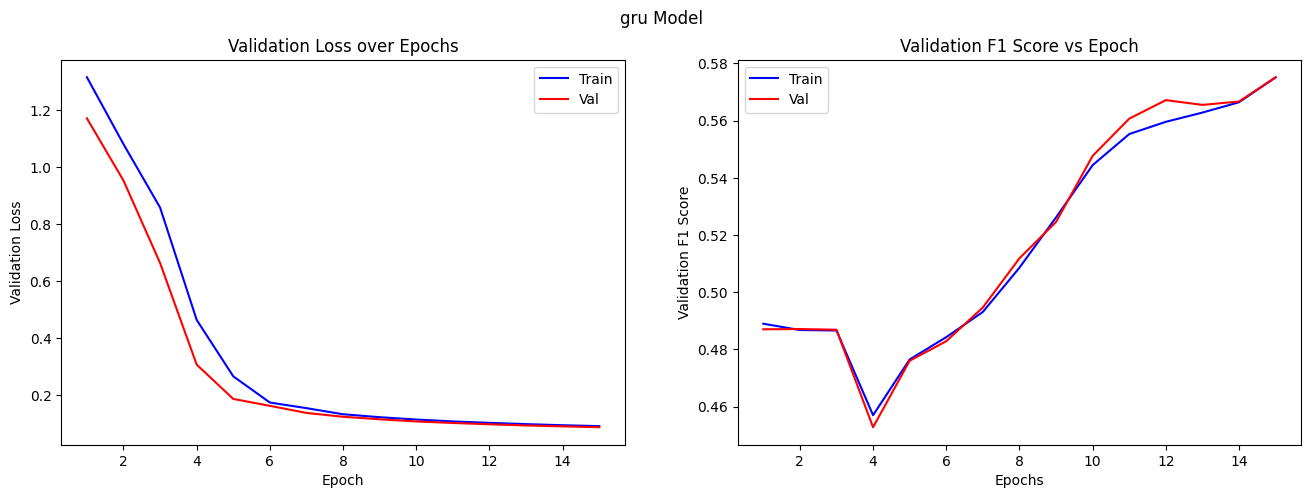

In [36]:
draw_loss_graph(gru_training, "gru Model", gru_f1_callback_train.f1_scores, gru_f1_callback_val.f1_scores)
save_model(gru_model, "gru","Word2Vec","t2")
loaded_model = load_model("Saved_Models/t2_gru_Word2Vec.pkl")

Evaluation

In [27]:
def my_f1(y_true, y_pred):
    
    # predictions = get_pred(y_pred)
    # real = get_real(y_true)

    predictions = y_pred
    real = y_true

    size=len(predictions)

    unique_labels= set()

    for labels in real:
        unique_labels.update(labels)

    for labels in predictions:
        unique_labels.update(labels)

    labels_f1=[]

    for labels in unique_labels:
        tp=0
        fp=0
        fn=0

        for i in range(size):
            l=[]
                    
            tp+=sum((p==labels and r==labels) for p,r in zip(predictions[i],real[i]))
            fp+=sum((p==labels and r!=labels) for p,r in zip(predictions[i],real[i]))
            fn+=sum((p!=labels and r==labels) for p,r in zip(predictions[i],real[i]))

        
        precision = tp/(tp+fp) if tp+fp>0 else 0
        recall = tp/(tp+fn) if tp+fn>0 else 0

        f1=2*((precision*recall)/(precision+recall)) if precision+recall>0 else 0

        labels_f1.append(f1)
        print(f1,unique_labels)
    macro_f1 = sum(labels_f1)/len(unique_labels)
    return macro_f1

In [37]:
tag_mapping=toke2.word_index
tag_mapping = {v: k.upper() for k, v in tag_mapping.items()}
word_mapping={v: k for k, v in mapping_ate_word2vec.items()}
word_mapping[0] = 'o'
tag_mapping[0] = 'o'
print(tag_mapping)
print(word_mapping)


i = 3

l=[[],[]]
for i in range(len(X_padded_test)):
    l1=[]
    l2=[]
    for w,pred1,actual in zip(X_padded_test[i],pred[i],real[i]):

        l1.append(tag_mapping[pred1])
        l2.append(tag_mapping[actual])
    l[0].append(l1)
    l[1].append(l2)

{1: 'O', 2: 'B', 3: 'I', 0: 'o'}
{1: '#UK', 2: 'the', 3: '.', 4: ',', 5: 'and', 6: 'it', 7: 'to', 8: 'i', 9: 'is', 10: 'a', 11: 'of', 12: 'for', 13: 'with', 14: 'that', 15: 'my', 16: 'you', 17: 'this', 18: 'was', 19: 'in', 20: 'not', 21: 'on', 22: 'very', 23: 'but', 24: 'computer', 25: 'use', 26: 'have', 27: 'great', 28: 'they', 29: 'laptop', 30: "n't", 31: 'so', 32: 'has', 33: 'are', 34: 'battery', 35: 'had', 36: 'screen', 37: ')', 38: 'be', 39: 'as', 40: 'all', 41: '!', 42: '(', 43: "'s", 44: 'also', 45: 'me', 46: 'just', 47: 'easy', 48: 'when', 49: 'at', 50: 'or', 51: 'only', 52: 'which', 53: 'up', 54: 'life', 55: 'can', 56: 'windows', 57: 'than', 58: 'out', 59: 'if', 60: 'do', 61: 'after', 62: 'more', 63: 'keyboard', 64: 'would', 65: 'drive', 66: 'hard', 67: 'price', 68: 'from', 69: 'well', 70: 'because', 71: 'good', 72: 'one', 73: 'an', 74: 'like', 75: 'mac', 76: 'about', 77: 'quality', 78: 'its', 79: 'love', 80: 'get', 81: 'no', 82: 'software', 83: 'time', 84: 'even', 85: 'macboo

In [30]:
Y_pred_ate = gru_model.predict(X_padded_test)
real = get_real(Y_padded_test)
real2=[]

for i in range(len(real)):
    for j in range(len(real[i])):
        if real[i][j]==0:
            real[i][j]=1

pred = get_pred(Y_pred_ate)
pred2=[]
for i in range(len(pred)):
    for j in range(len(pred[i])):
        if pred[i][j]==0:
            pred[i][j]=1

f1 = F1Score(average='macro')
f1.update_state(real,pred)
print(real)
f1Score = f1.result().numpy()
print(f"F1 Score ATE : {f1Score}")

 1/11 [=>............................] - ETA: 0s

11/11 [==============================] - 0s 9ms/step
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1], [1

In [31]:
dic ={}
for i in real:
    for j in i:
        if j in dic:
            dic[j]+=1
        else:
            dic[j]=1
        
dic

{1: 24920, 2: 437, 3: 227}

In [32]:
dic2 ={}
for i in pred:
    for j in i:
        if j in dic2:
            dic2[j]+=1
        else:
            dic2[j]=1

dic2

{1: 25425, 2: 158, 3: 1}

In [33]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(l[1], l[0],average='macro')))

F1-score: 21.8%


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: o seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


In [34]:
my_f1(l[1],l[0])

0.008771929824561405 {'I', 'O', 'B', 'o'}
0.9416004239533651 {'I', 'O', 'B', 'o'}
0.3294117647058824 {'I', 'O', 'B', 'o'}
0.9979467122952824 {'I', 'O', 'B', 'o'}


0.5694327076947728

In [35]:
from sklearn.metrics import f1_score
true_labels_flat = [label for sublist in l[1] for label in sublist]
predicted_labels_flat = [label for sublist in l[0] for label in sublist]

# Compute F1 score
f1 = f1_score(true_labels_flat, predicted_labels_flat, average='macro')

print("F1 Score:", f1)


F1 Score: 0.5694327076947728
